In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
xbp_df = pd.read_excel('/content/X_bp.xlsx',index_col=0)
xnup_df = pd.read_excel('/content/X_nup.xlsx',index_col=0)

In [4]:
xbp_df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  
0.0                    220.0  
1.0                    220.0  
2.0                    220.0  
3.0                    220.0  
4.0                    220.0

In [5]:
xnup_df.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                 0.0          4.0               57.0
1.0                 0.0          4.0               60.0
2.0                 0.0          4.0               70.0
3.0                 0.0          5.0               47.0
4.0                 0.0          5.0               57.0

In [6]:
xbp_df.shape

(1023, 10)

In [7]:
xnup_df.shape

(1040, 3)

In [8]:
df_join = xbp_df.join(xnup_df, how='inner')
df_join

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0.0                       3000.000000               220.000000   
1.0                       3000.000000               220.000000   
2.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

In [9]:
pd.DataFrame(df_join.columns, columns=['Xарактеристики композитных материалов'])

Xарактеристики композитных материалов
0        Соотношение матрица-наполнитель
1                       Плотность, кг/м3
2                  модуль упругости, ГПа
3            Количество отвердителя, м.%
4        Содержание эпоксидных групп,%_2
5               Температура вспышки, С_2
6          Поверхностная плотность, г/м2
7   Модуль упругости при растяжении, ГПа
8          Прочность при растяжении, МПа
9                Потребление смолы, г/м2
10                    Угол нашивки, град
11                           Шаг нашивки
12                     Плотность нашивки

In [10]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Описательная статистика

In [11]:
df_join.describe().T.round(2)

count     mean     std      min  \
Соотношение матрица-наполнитель       1023.0     2.93    0.91     0.39   
Плотность, кг/м3                      1023.0  1975.73   73.73  1731.76   
модуль упругости, ГПа                 1023.0   739.92  330.23     2.44   
Количество отвердителя, м.%           1023.0   110.57   28.30    17.74   
Содержание эпоксидных групп,%_2       1023.0    22.24    2.41    14.25   
Температура вспышки, С_2              1023.0   285.88   40.94   100.00   
Поверхностная плотность, г/м2         1023.0   482.73  281.31     0.60   
Модуль упругости при растяжении, ГПа  1023.0    73.33    3.12    64.05   
Прочность при растяжении, МПа         1023.0  2466.92  485.63  1036.86   
Потребление смолы, г/м2               1023.0   218.42   59.74    33.80   
Угол нашивки, град                    1023.0    44.25   45.02     0.00   
Шаг нашивки                           1023.0     6.90    2.56     0.00   
Плотность нашивки                     1023.0    57.15   12.35     0.00   

                                          25%      50%      75%      max  
Соотношение матрица-наполнитель          2.32     2.91     3.55     5.59  
Плотность, кг/м3                      1924.16  1977.62  2021.37  2207.77  
модуль упругости, ГПа                  500.05   739.66   961.81  1911.54  
Количество отвердителя, м.%             92.44   110.56   129.73   198.95  
Содержание эпоксидных групп,%_2         20.61    22.23    23.96    33.00  
Температура вспышки, С_2               259.07   285.90   313.00   413.27  
Поверхностная плотность, г/м2          266.82   451.86   693.23  1399.54  
Модуль упругости при растяжении, ГПа    71.25    73.27    75.36    82.68  
Прочность при растяжении, МПа         2135.85  2459.52  2767.19  3848.44  
Потребление смолы, г/м2                179.63   219.20   257.48   414.59  
Угол нашивки, град                       0.00     0.00    90.00    90.00  
Шаг нашивки                              5.08     6.92     8.59    14.44  
Плотность нашивки                       49.80    57.34    64.94   103.99

In [12]:
df_join.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [13]:
df_join.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

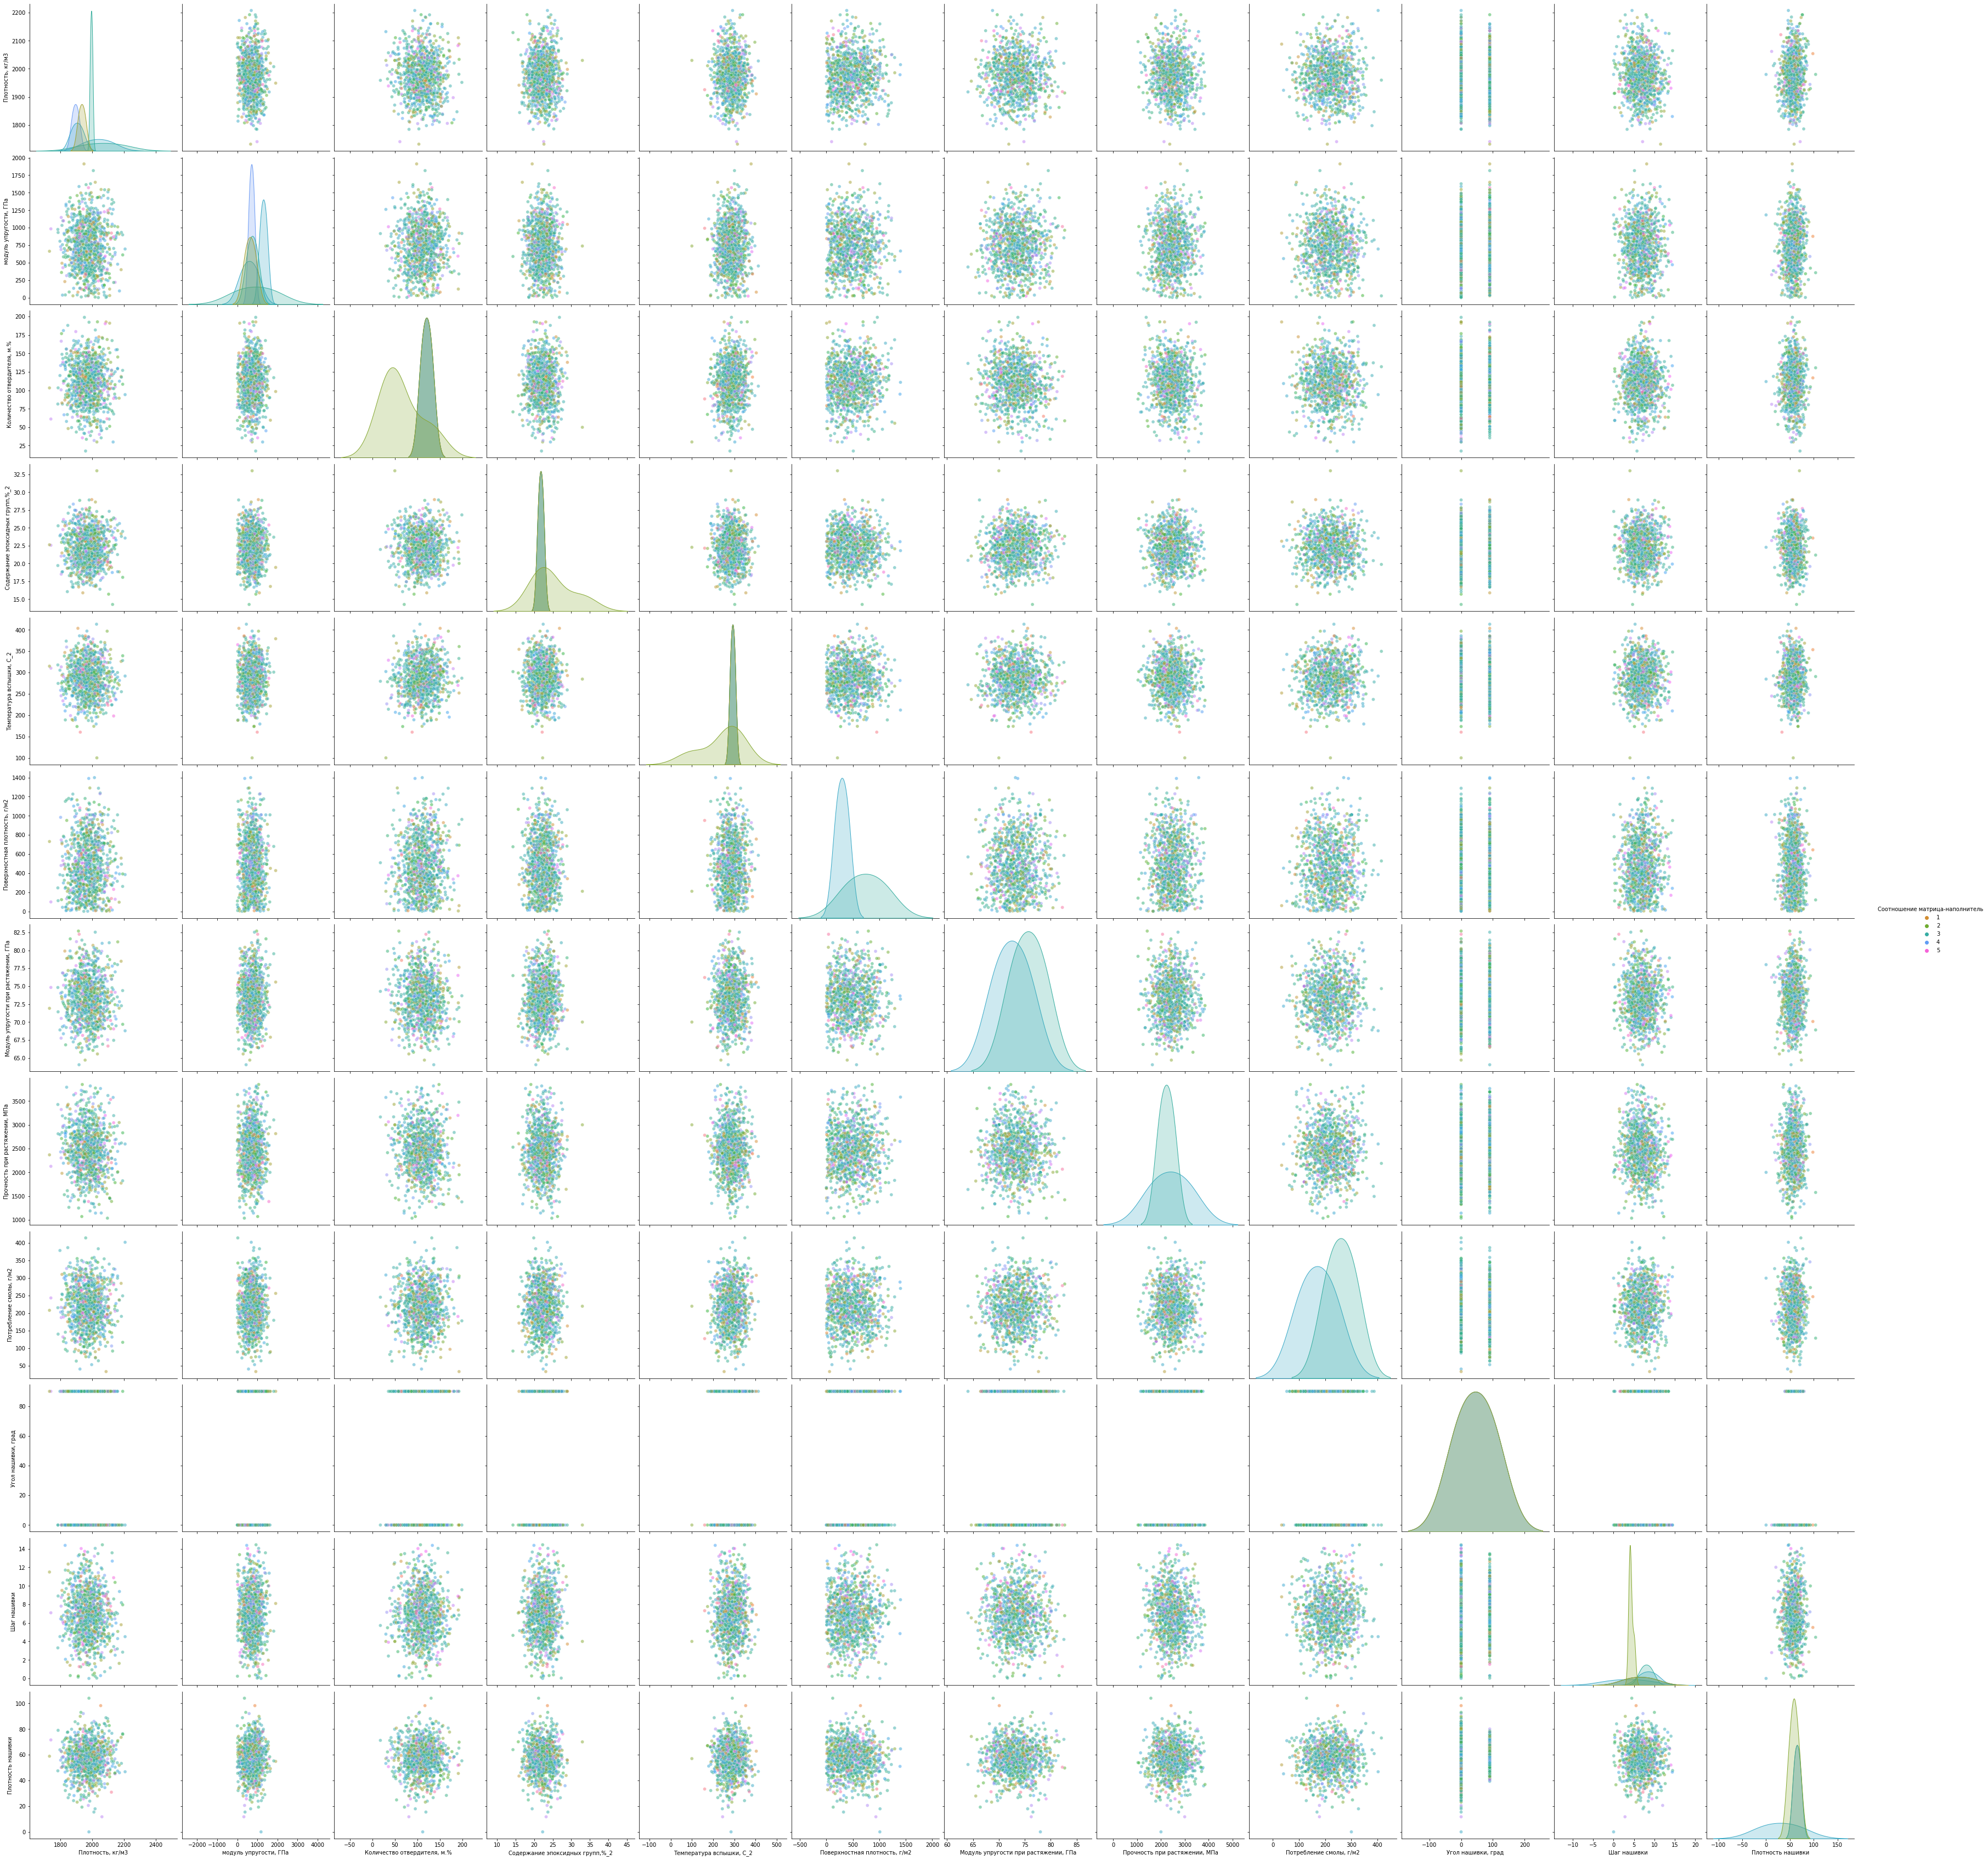

In [14]:
sns.pairplot(df_join, hue = 'Соотношение матрица-наполнитель', height=4, kind='scatter',palette = "husl", plot_kws={'alpha':0.5})

Корреляционная матрица

<function matplotlib.pyplot.show(*args, **kw)>

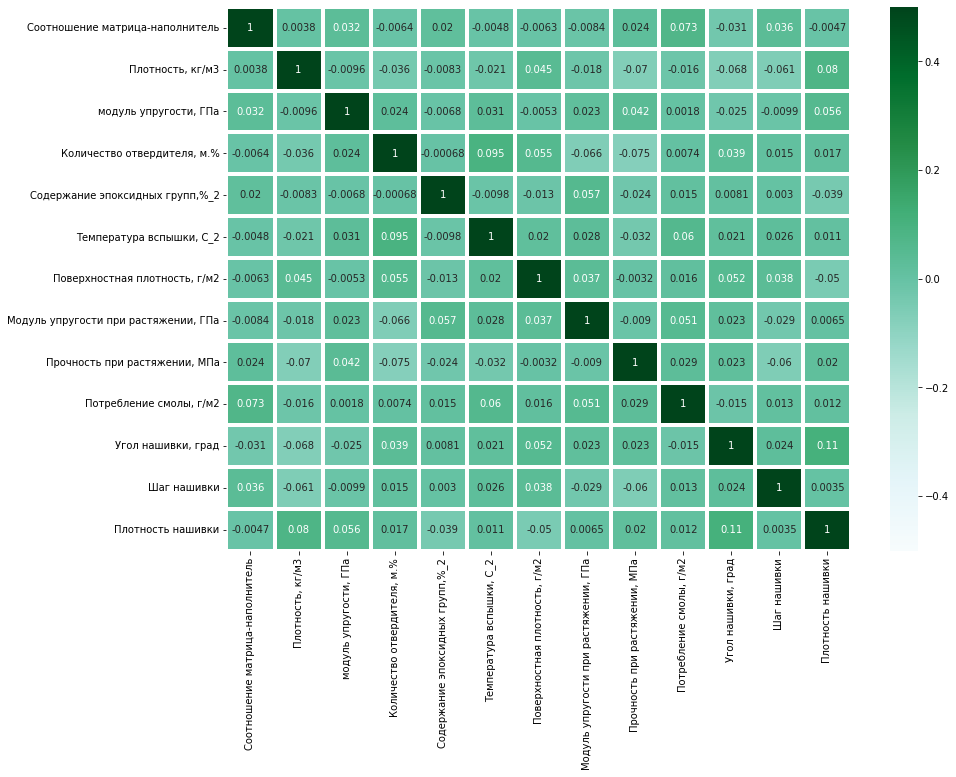

In [15]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_join.corr(), annot = True, vmin=-0.5, vmax=0.5, cmap= 'BuGn', linewidths=3)
plt.show

На корреляционной матрице видно, что взаимосвязь между признаками отсутствует

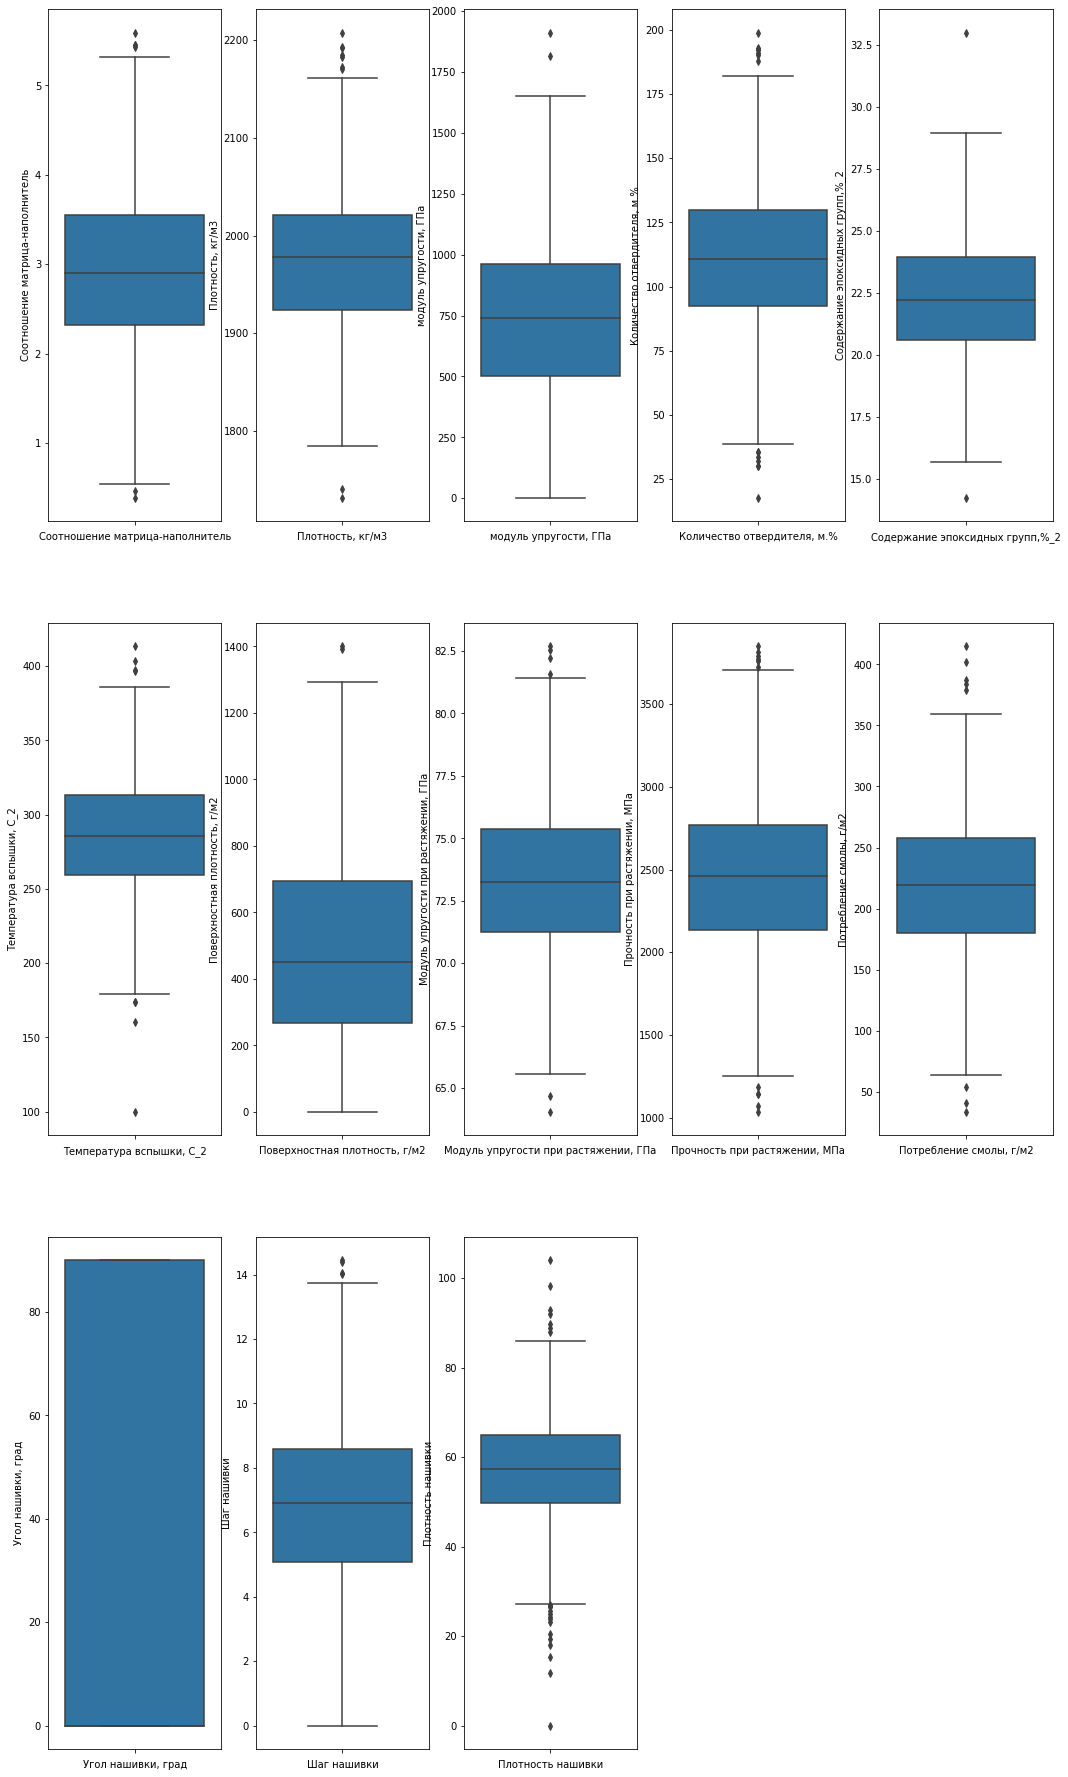

In [16]:
#Нарисуем boxplot

n = 1 #счетчик
fig = plt.figure(figsize=(18, 32))
for i in df_join.columns:
  plt.subplot(3,5,n)
  plt.xlabel(i)
  sns.boxplot(y = df_join[i]) 
  n=n+1
plt.show()

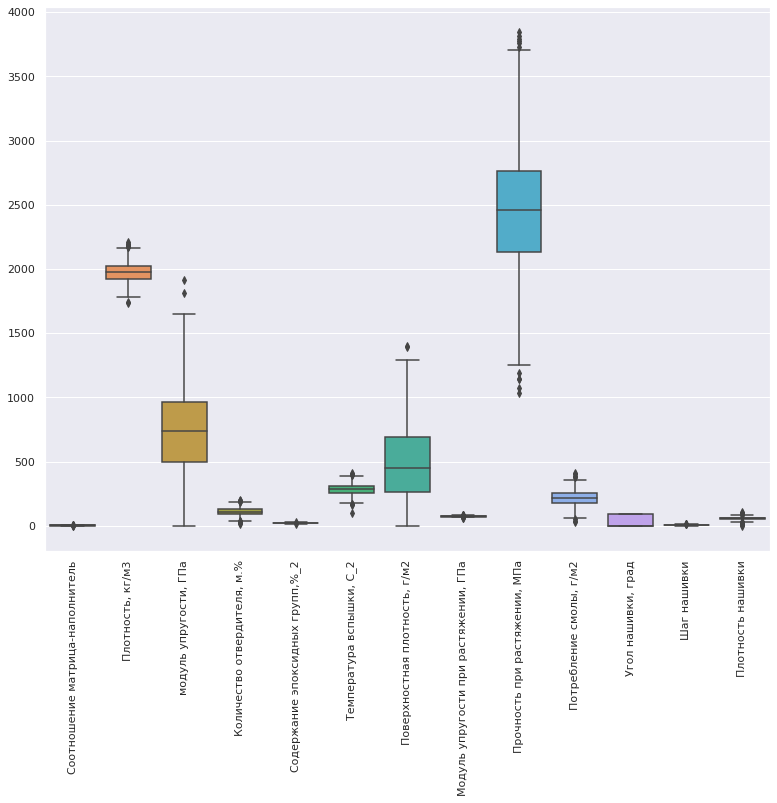

In [17]:
sns.set(rc={'figure.figsize':(13,10)})
ax = sns.boxplot(data=df_join)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [18]:
#"Угол нашивки" закодируем с помощью LabelEncoder
le = LabelEncoder()
df_join['Угол нашивки, град'] = le.fit_transform(df_join['Угол нашивки, град'])

In [19]:
#Нормализация данных
min_max_scaler = MinMaxScaler()
df_join_norm = pd.DataFrame(min_max_scaler.fit_transform(df_join),
                                  columns = df_join.columns,
                                  index = df_join.index)

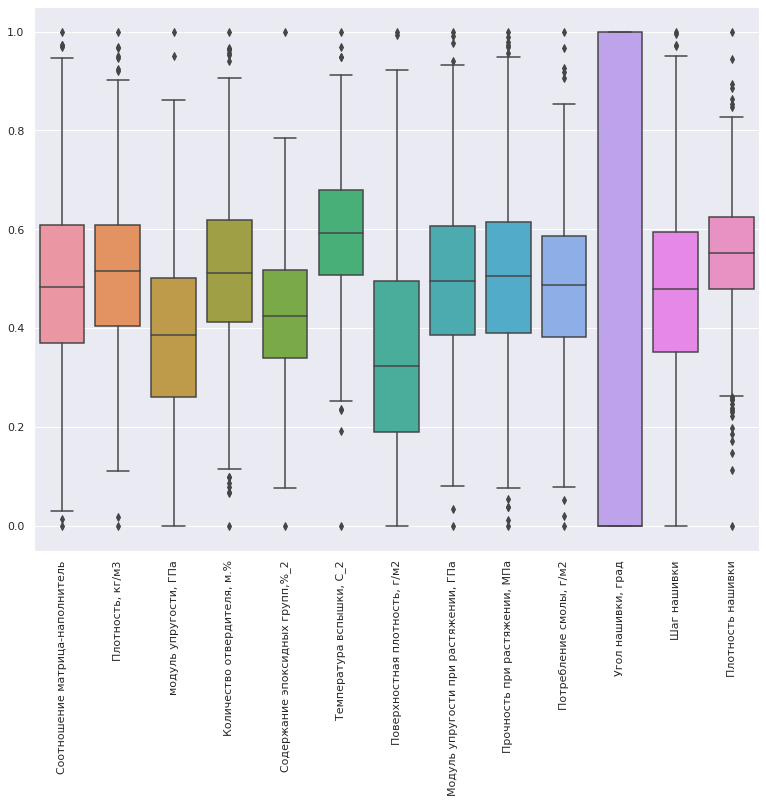

In [20]:
#Ящик с усами на нормализованных данных
sns.set(rc={'figure.figsize':(13,10)})
ax = sns.boxplot(data=df_join_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [21]:
#Описательная статистика для нормализованного датасета
df_join_norm.describe().T.round(2)

count  mean   std  min   25%   50%  \
Соотношение матрица-наполнитель       1023.0  0.49  0.18  0.0  0.37  0.48   
Плотность, кг/м3                      1023.0  0.51  0.15  0.0  0.40  0.52   
модуль упругости, ГПа                 1023.0  0.39  0.17  0.0  0.26  0.39   
Количество отвердителя, м.%           1023.0  0.51  0.16  0.0  0.41  0.51   
Содержание эпоксидных групп,%_2       1023.0  0.43  0.13  0.0  0.34  0.43   
Температура вспышки, С_2              1023.0  0.59  0.13  0.0  0.51  0.59   
Поверхностная плотность, г/м2         1023.0  0.34  0.20  0.0  0.19  0.32   
Модуль упругости при растяжении, ГПа  1023.0  0.50  0.17  0.0  0.39  0.49   
Прочность при растяжении, МПа         1023.0  0.51  0.17  0.0  0.39  0.51   
Потребление смолы, г/м2               1023.0  0.48  0.16  0.0  0.38  0.49   
Угол нашивки, град                    1023.0  0.49  0.50  0.0  0.00  0.00   
Шаг нашивки                           1023.0  0.48  0.18  0.0  0.35  0.48   
Плотность нашивки                     1023.0  0.55  0.12  0.0  0.48  0.55   

                                       75%  max  
Соотношение матрица-наполнитель       0.61  1.0  
Плотность, кг/м3                      0.61  1.0  
модуль упругости, ГПа                 0.50  1.0  
Количество отвердителя, м.%           0.62  1.0  
Содержание эпоксидных групп,%_2       0.52  1.0  
Температура вспышки, С_2              0.68  1.0  
Поверхностная плотность, г/м2         0.50  1.0  
Модуль упругости при растяжении, ГПа  0.61  1.0  
Прочность при растяжении, МПа         0.62  1.0  
Потребление смолы, г/м2               0.59  1.0  
Угол нашивки, град                    1.00  1.0  
Шаг нашивки                           0.59  1.0  
Плотность нашивки                     0.62  1.0

<function matplotlib.pyplot.show(*args, **kw)>

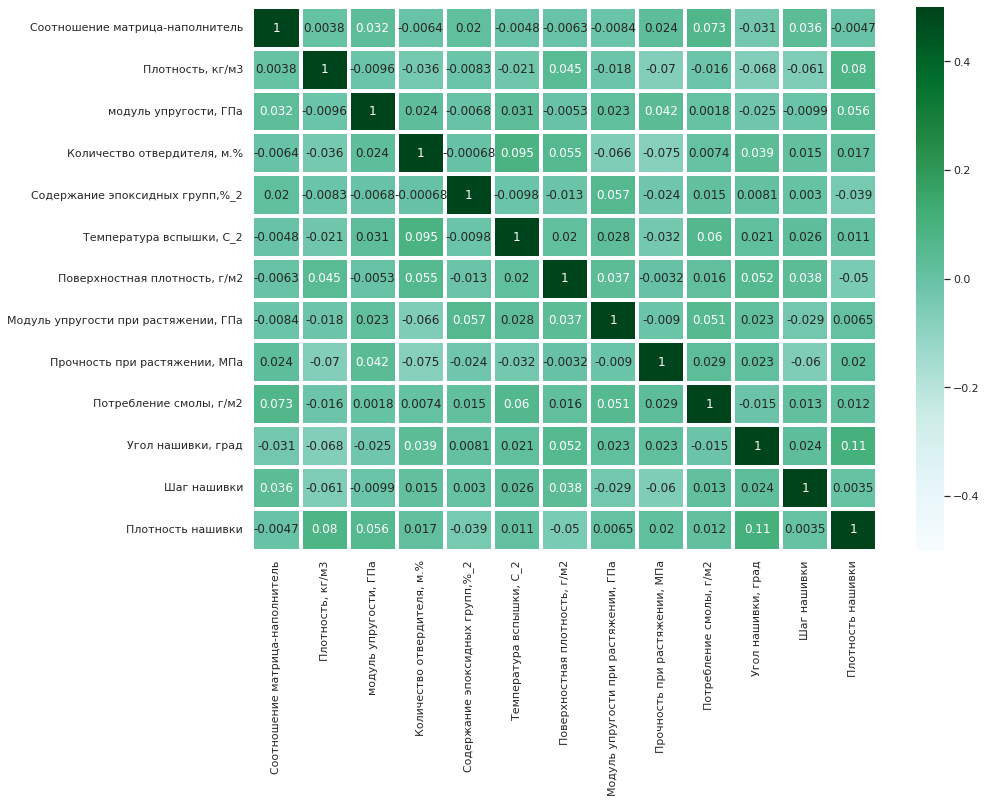

In [22]:
#строим корреляционную матрицу на нормализованных данных
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_join_norm.corr(), annot = True, vmin=-0.5, vmax=0.5, cmap= 'BuGn', linewidths=3)
plt.show

Взаимосвязь между признаками отсутствует

Модели

In [23]:
#Выделяем целевые признаки
target_elastic = df_join_norm['Модуль упругости при растяжении, ГПа']
target_strength = df_join_norm['Прочность при растяжении, МПа']

In [24]:
train_df_elastic = df_join_norm.loc[:, df_join_norm.columns != 'Модуль упругости при растяжении, ГПа']
train_df_strength = df_join_norm.loc[:, df_join_norm.columns != 'Прочность при растяжении, МПа']

In [25]:
#Разделяем датасет на обучающую и тестовую выборки
X_input_elastic, X_output_elastic, y_input_elastic, y_output_elastic = train_test_split(train_df_elastic, target_elastic, test_size=0.3, random_state=42)
X_input_strength, X_output_strength, y_input_strength, y_output_strength = train_test_split(train_df_strength, target_strength, test_size=0.3, random_state=42)

In [26]:
#Итоговый датасет ошибок
errors_df = pd.DataFrame(columns=['target_var','model_name','MSE','R2'])

In [27]:
#Определение функции для визуализации
def actual_and_predicted_plot(orig, predict, var, model_name): 
  plt.figure(figsize=(17,5))
  plt.title(f'Тестовые и прогнозные значения: {model_name}') 
  plt.plot(orig, label='Тест')
  plt.plot(predict, label='Прогноз')
  plt.legend(loc='best')
  plt.ylabel(var)
  plt.xlabel('Количество наблюдений')
  plt.show()

XGBRegressor

In [28]:
XGBR_model = XGBRegressor()

XGBR_el = XGBR_model.fit(X_input_elastic,  y_input_elastic)
prediction_y_test_XGBR_el = XGBR_el.predict(X_output_elastic)

MSE_elastic = mean_squared_error(y_output_elastic, prediction_y_test_XGBR_el)
R2_elastic = r2_score(y_output_elastic, prediction_y_test_XGBR_el)
print (MSE_elastic, R2_elastic)

XGBR_str = XGBR_model.fit(X_input_strength,  y_input_strength)
prediction_y_test_XGBR_str = XGBR_str.predict(X_output_strength)

MSE_strength = mean_squared_error(y_output_strength, prediction_y_test_XGBR_str)
R2_strength = r2_score(y_output_strength, prediction_y_test_XGBR_str)
print (MSE_strength, R2_strength)

[21:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.03223107361788612 -0.12580756900903967
[21:19:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.029512515931324156 -0.04178834500525119


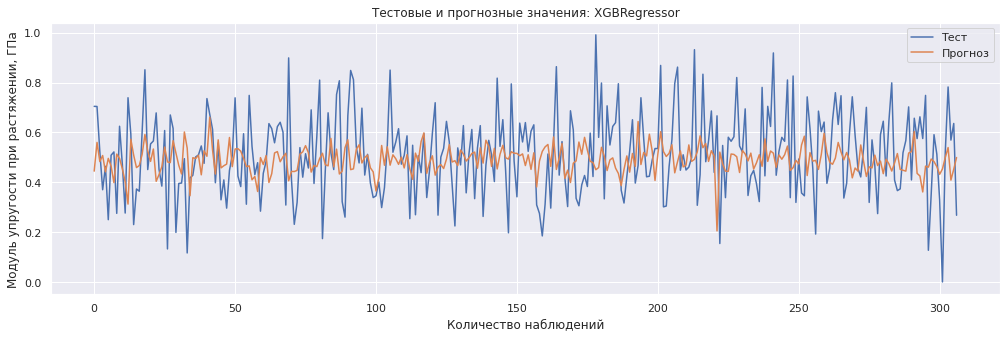

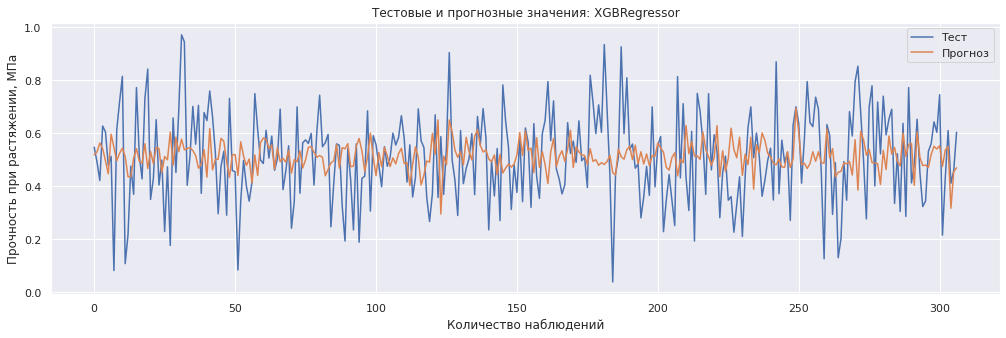

In [29]:
#Визуализация
actual_and_predicted_plot(y_output_elastic.values, prediction_y_test_XGBR_el, 'Модуль упругости при растяжении, ГПа', 'XGBRegressor') 
actual_and_predicted_plot(y_output_strength.values, prediction_y_test_XGBR_str, 'Прочность при растяжении, МПа', 'XGBRegressor')

In [30]:
XGBR_errors = pd.DataFrame({'model_name':'XGBRegressor',\
                              'target_var':['Модуль упругости при растяжении, ГПа', 
                                            'Прочность при растяжении, МПа'],\
                              'MSE':[MSE_elastic, MSE_strength],\
                              'R2':[R2_elastic, R2_strength]}) 
errors_df = pd.concat([errors_df, XGBR_errors], ignore_index=True)
errors_df

target_var    model_name       MSE        R2
0  Модуль упругости при растяжении, ГПа  XGBRegressor  0.032231 -0.125808
1         Прочность при растяжении, МПа  XGBRegressor  0.029513 -0.041788

RANSACRegressor

In [31]:
RANSAC_model = RANSACRegressor(base_estimator= DecisionTreeRegressor(), max_trials=300)

ransac_el = RANSAC_model.fit(X_input_elastic,  y_input_elastic)
prediction_y_test_ransac_el = ransac_el.predict(X_output_elastic)

MSE_elastic = mean_squared_error(y_output_elastic, prediction_y_test_ransac_el)
R2_elastic = r2_score(y_output_elastic, prediction_y_test_ransac_el)
print (MSE_elastic, R2_elastic)

ransac_str = RANSAC_model.fit(X_input_strength,  y_input_strength)
prediction_y_test_ransac_str = ransac_str.predict(X_output_strength)

MSE_strength = mean_squared_error(y_output_strength, prediction_y_test_ransac_str)
R2_strength = r2_score(y_output_strength, prediction_y_test_ransac_str)
print (MSE_strength, R2_strength)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ransac.py:320: FutureWarning: From version 1.2, `min_samples` needs to be explicitly set otherwise an error will be raised. To keep the current behavior, you need to set `min_samples` to `X.shape[1] + 1 that is 13
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ransac.py:320: FutureWarning: From version 1.2, `min_samples` needs to be explicitly set otherwise an error will be raised. To keep the current behavior, you need to set `min_samples` to `X.shape[1] + 1 that is 13
  warnings.warn(


0.04471660718731124 -0.5619180244725814
0.039020540134808025 -0.37742048230818903


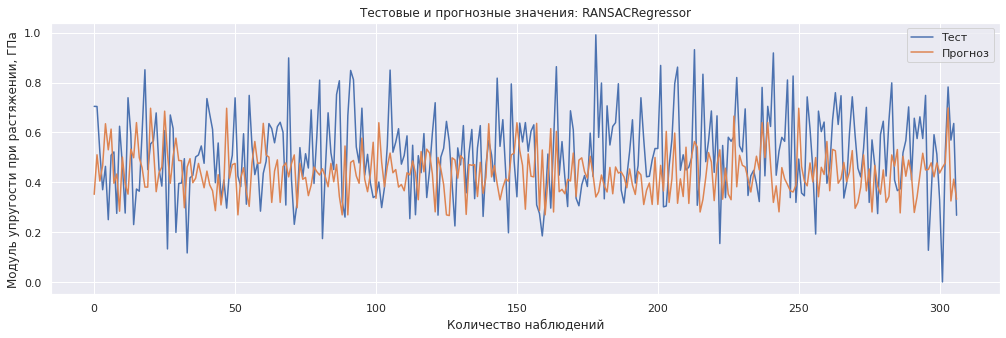

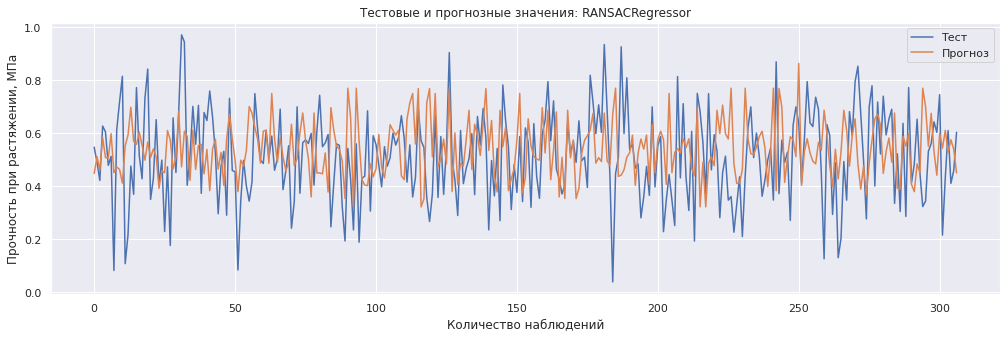

In [32]:
#Визуализация
actual_and_predicted_plot(y_output_elastic.values, prediction_y_test_ransac_el, 'Модуль упругости при растяжении, ГПа', 'RANSACRegressor') 
actual_and_predicted_plot(y_output_strength.values, prediction_y_test_ransac_str, 'Прочность при растяжении, МПа', 'RANSACRegressor')

In [33]:
RANSAC_errors = pd.DataFrame({'model_name':'RANSACRegressor',\
                              'target_var':['Модуль упругости при растяжении, ГПа', 
                                            'Прочность при растяжении, МПа'],\
                              'MSE':[MSE_elastic, MSE_strength],\
                              'R2':[R2_elastic, R2_strength]}) 
errors_df = pd.concat([errors_df, RANSAC_errors], ignore_index=True)
errors_df

target_var       model_name       MSE        R2
0  Модуль упругости при растяжении, ГПа     XGBRegressor  0.032231 -0.125808
1         Прочность при растяжении, МПа     XGBRegressor  0.029513 -0.041788
2  Модуль упругости при растяжении, ГПа  RANSACRegressor  0.044717 -0.561918
3         Прочность при растяжении, МПа  RANSACRegressor  0.039021 -0.377420

Ridge Regression

In [34]:
Ridge_model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)

Ridge_str = Ridge_model.fit(X_input_strength,  y_input_strength)
prediction_y_test_Ridge_str = Ridge_str.predict(X_output_strength)

MSE_strength = mean_squared_error(y_output_strength, prediction_y_test_Ridge_str)
R2_strength = r2_score(y_output_strength, prediction_y_test_Ridge_str)
print (MSE_strength, R2_strength)

Ridge_el = Ridge_model.fit(X_input_elastic,  y_input_elastic)
prediction_y_test_Ridge_el = Ridge_el.predict(X_output_elastic)

MSE_elastic = mean_squared_error(y_output_elastic, prediction_y_test_Ridge_el)
R2_elastic = r2_score(y_output_elastic, prediction_y_test_Ridge_el)
print (MSE_elastic, R2_elastic)


0.028226952994615185 0.0035918756221819947
0.029052125575356892 -0.01476926447735849


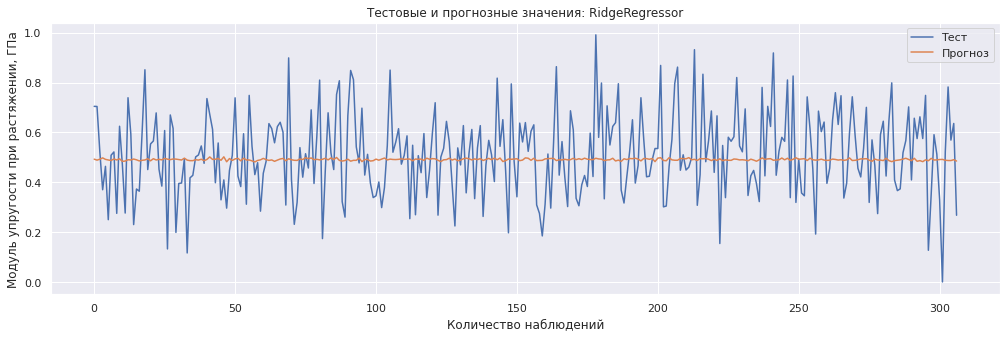

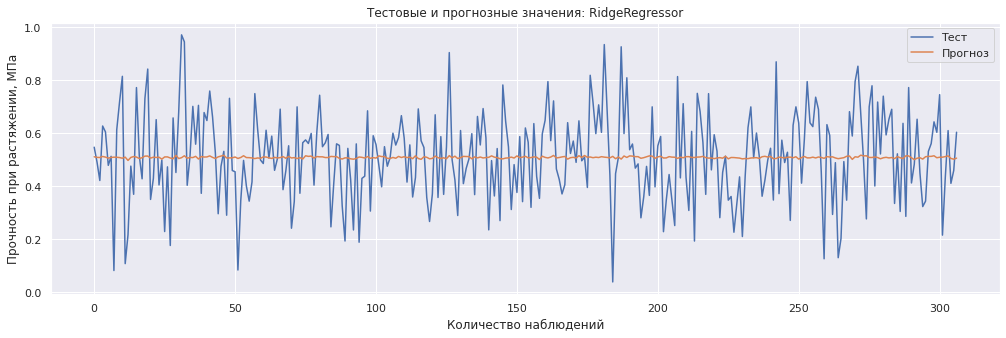

In [35]:
#Визуализация
actual_and_predicted_plot(y_output_elastic.values, prediction_y_test_Ridge_el, 'Модуль упругости при растяжении, ГПа', 'RidgeRegressor') 
actual_and_predicted_plot(y_output_strength.values, prediction_y_test_Ridge_str, 'Прочность при растяжении, МПа', 'RidgeRegressor')

In [36]:
Ridge_errors = pd.DataFrame({'model_name':'RidgeRegressor',\
                              'target_var':['Модуль упругости при растяжении, ГПа', 
                                            'Прочность при растяжении, МПа'],\
                              'MSE':[MSE_elastic, MSE_strength],\
                              'R2':[R2_elastic, R2_strength]}) 
errors_df = pd.concat([errors_df, Ridge_errors], ignore_index=True)
errors_df

target_var       model_name       MSE        R2
0  Модуль упругости при растяжении, ГПа     XGBRegressor  0.032231 -0.125808
1         Прочность при растяжении, МПа     XGBRegressor  0.029513 -0.041788
2  Модуль упругости при растяжении, ГПа  RANSACRegressor  0.044717 -0.561918
3         Прочность при растяжении, МПа  RANSACRegressor  0.039021 -0.377420
4  Модуль упругости при растяжении, ГПа   RidgeRegressor  0.029052 -0.014769
5         Прочность при растяжении, МПа   RidgeRegressor  0.028227  0.003592

LASSO Regression

In [37]:
Lasso_model = Lasso(alpha=0.1, 
              precompute=True,  
              positive=True, 
              selection='random',
              random_state=42)

Lasso_el = Lasso_model.fit(X_input_elastic,  y_input_elastic)
prediction_y_test_Lasso_el = Lasso_el.predict(X_output_elastic)

MSE_elastic = mean_squared_error(y_output_elastic, prediction_y_test_Lasso_el)
R2_elastic = r2_score(y_output_elastic, prediction_y_test_Lasso_el)
print (MSE_elastic, R2_elastic)

Lasso_str = Lasso_model.fit(X_input_strength,  y_input_strength)
prediction_y_test_Lasso_str = Lasso_str.predict(X_output_strength)

MSE_strength = mean_squared_error(y_output_strength, prediction_y_test_Lasso_str)
R2_strength = r2_score(y_output_strength, prediction_y_test_Lasso_str)
print (MSE_strength, R2_strength)


0.02909954291186678 -0.016425516980081545
0.02833672305042659 -0.0002829944512812155


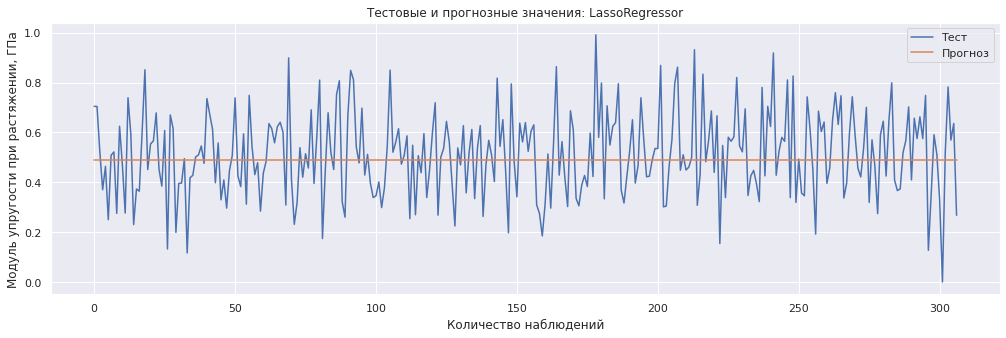

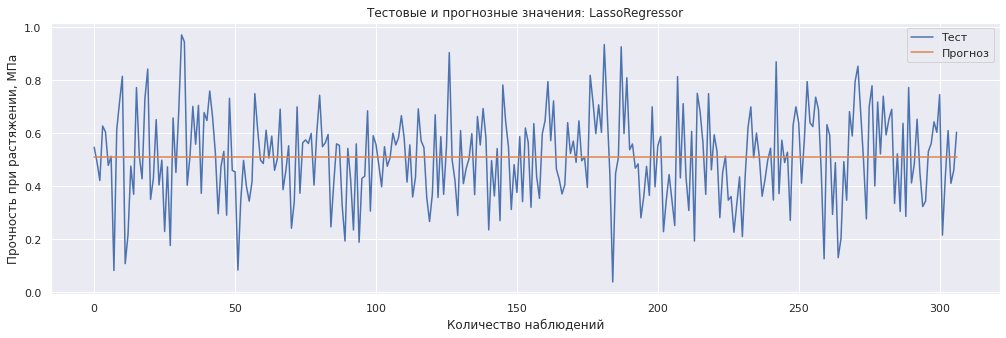

In [38]:
#Визуализация
actual_and_predicted_plot(y_output_elastic.values, prediction_y_test_Lasso_el, 'Модуль упругости при растяжении, ГПа', 'LassoRegressor') 
actual_and_predicted_plot(y_output_strength.values, prediction_y_test_Lasso_str, 'Прочность при растяжении, МПа', 'LassoRegressor')

In [39]:
Lasso_errors = pd.DataFrame({'model_name':'LassoRegressor',\
                              'target_var':['Модуль упругости при растяжении, ГПа', 
                                            'Прочность при растяжении, МПа'],\
                              'MSE':[MSE_elastic, MSE_strength],\
                              'R2':[R2_elastic, R2_strength]}) 
errors_df = pd.concat([errors_df, Lasso_errors], ignore_index=True)
errors_df

target_var       model_name       MSE        R2
0  Модуль упругости при растяжении, ГПа     XGBRegressor  0.032231 -0.125808
1         Прочность при растяжении, МПа     XGBRegressor  0.029513 -0.041788
2  Модуль упругости при растяжении, ГПа  RANSACRegressor  0.044717 -0.561918
3         Прочность при растяжении, МПа  RANSACRegressor  0.039021 -0.377420
4  Модуль упругости при растяжении, ГПа   RidgeRegressor  0.029052 -0.014769
5         Прочность при растяжении, МПа   RidgeRegressor  0.028227  0.003592
6  Модуль упругости при растяжении, ГПа   LassoRegressor  0.029100 -0.016426
7         Прочность при растяжении, МПа   LassoRegressor  0.028337 -0.000283

Последовательная модель Sequential

In [40]:
#X_input_elastic, X_output_elastic, y_input_elastic, y_output_elastic = train_test_split(train_df_elastic, target_elastic, test_size=0.3, random_state=42)
#X_input_strength, X_output_strength, y_input_strength, y_output_strength = train_test_split(train_df_strength, target_strength, test_size=0.3, random_state=42)

X_train_el = np.array(X_input_elastic)
X_test_el = np.array(X_output_elastic)
y_train_el = np.array(y_input_elastic)
y_test_el = np.array(y_output_elastic)

model_el = Sequential()

model_el.add(Dense(X_train_el.shape[1], activation='relu'))
model_el.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model_el.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model_el.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model_el.add(Dense(512, activation='relu'))
model_el.add(Dropout(0.1))
model_el.add(Dense(1))

model_el.compile(optimizer=Adam(0.00001), loss='mse')

elastic = model_el.fit(X_train_el, y_train_el,
              validation_data=(X_test_el,y_test_el),
              batch_size=1,
              epochs=100)


Epoch 1/100
716/716 [==============================] - 3s 3ms/step - loss: 0.1178 - val_loss: 0.0384
Epoch 2/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0317 - val_loss: 0.0308
Epoch 3/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0306 - val_loss: 0.0303
Epoch 4/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0305 - val_loss: 0.0305
Epoch 5/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0300 - val_loss: 0.0302
Epoch 6/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0297 - val_loss: 0.0299
Epoch 7/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0295 - val_loss: 0.0304
Epoch 8/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0301 - val_loss: 0.0300
Epoch 9/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0293 - val_loss: 0.0297
Epoch 10/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0291 - val_lo

In [41]:
pd.DataFrame(elastic.history)

loss  val_loss
0   0.117752  0.038400
1   0.031671  0.030805
2   0.030561  0.030344
3   0.030506  0.030484
4   0.030048  0.030180
..       ...       ...
95  0.026934  0.029582
96  0.027092  0.028708
97  0.027042  0.029217
98  0.026850  0.029069
99  0.027213  0.028720

[100 rows x 2 columns]

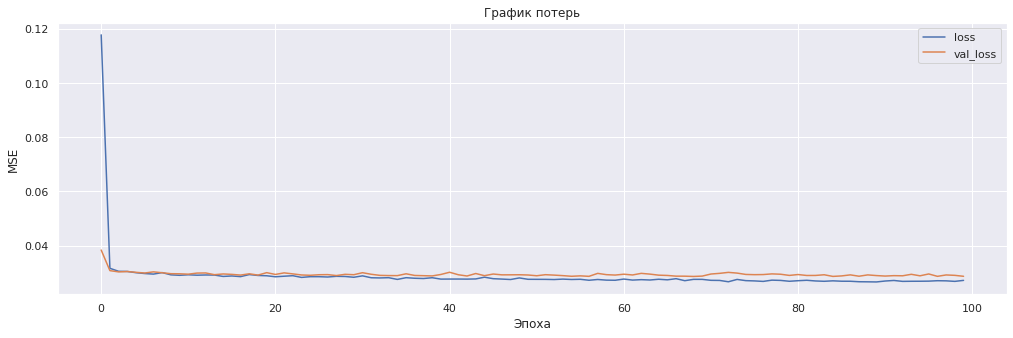

In [42]:
def model_loss_plot(elastic): 
  plt.figure(figsize=(17,5)) 
  plt.plot(elastic.history['loss']) 
  plt.plot(elastic.history['val_loss']) 
  plt.title('График потерь') 
  plt.ylabel('MSE')
  plt.xlabel('Эпоха')
  plt.legend(['loss', 'val_loss'], loc='best')
  plt.show()

model_loss_plot(elastic)

In [43]:
MSE_elastic = mean_squared_error(y_test_el, model_el.predict(X_test_el))
R2_elastic = r2_score(y_test_el, model_el.predict(X_test_el))
print (MSE_elastic, R2_elastic)

10/10 [==============================] - 0s 2ms/step
0.028719739111077804 -0.0031592510549729447


In [44]:
X_train_str = np.array(X_input_strength)
X_test_str = np.array(X_output_strength)
y_train_str = np.array(y_input_strength)
y_test_str = np.array(y_output_strength)

model_str = Sequential()

model_str.add(Dense(X_train_str.shape[1], activation='relu'))
model_str.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model_str.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model_str.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model_str.add(Dense(512, activation='relu'))
model_str.add(Dropout(0.1))
model_str.add(Dense(1))

model_str.compile(optimizer=Adam(0.00001), loss='mse')

strength = model_str.fit(X_train_str, y_train_str,
              validation_data=(X_test_str,y_test_str),
              batch_size=1,
              epochs=100)

Epoch 1/100
716/716 [==============================] - 3s 3ms/step - loss: 0.0920 - val_loss: 0.0328
Epoch 2/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0342 - val_loss: 0.0319
Epoch 3/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0332 - val_loss: 0.0315
Epoch 4/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0324 - val_loss: 0.0313
Epoch 5/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0322 - val_loss: 0.0315
Epoch 6/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0322 - val_loss: 0.0312
Epoch 7/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0316 - val_loss: 0.0313
Epoch 8/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0320 - val_loss: 0.0313
Epoch 9/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0320 - val_loss: 0.0312
Epoch 10/100
716/716 [==============================] - 2s 3ms/step - loss: 0.0320 - val_lo

In [45]:
pd.DataFrame(strength.history)

loss  val_loss
0   0.091958  0.032779
1   0.034175  0.031882
2   0.033186  0.031514
3   0.032417  0.031331
4   0.032191  0.031520
..       ...       ...
95  0.028435  0.031204
96  0.028759  0.030733
97  0.028763  0.030722
98  0.028558  0.030880
99  0.028554  0.030707

[100 rows x 2 columns]

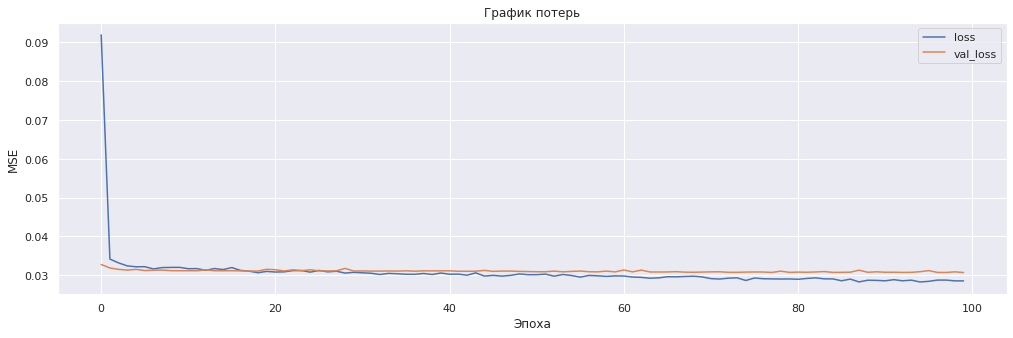

In [46]:
def model_loss_plot(strength): 
  plt.figure(figsize=(17,5)) 
  plt.plot(strength.history['loss']) 
  plt.plot(strength.history['val_loss']) 
  plt.title('График потерь') 
  plt.ylabel('MSE')
  plt.xlabel('Эпоха')
  plt.legend(['loss', 'val_loss'], loc='best')
  plt.show()

model_loss_plot(strength)

In [48]:
MSE_strength = mean_squared_error(y_test_str, model_str.predict(X_test_str))
R2_strength = r2_score(y_test_str, model_str.predict(X_test_str))
print (MSE_strength, R2_strength)

10/10 [==============================] - 0s 3ms/step
0.030706613782309607 -0.08393985885270672


10/10 [==============================] - 0s 2ms/step


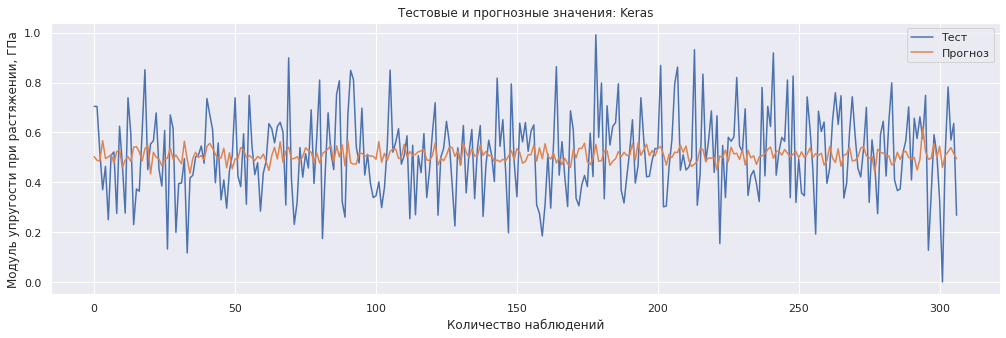

10/10 [==============================] - 0s 2ms/step


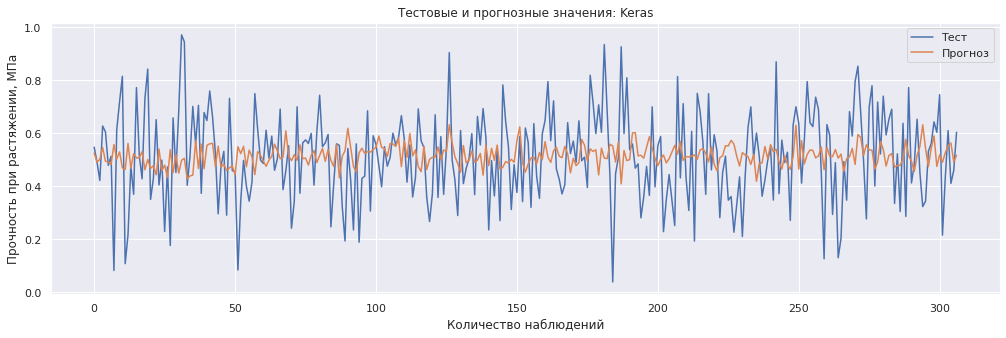

In [47]:
#Визуализация
actual_and_predicted_plot(y_test_el, model_el.predict(X_test_el), 'Модуль упругости при растяжении, ГПа', 'Keras')
actual_and_predicted_plot(y_test_str, model_str.predict(X_test_str), 'Прочность при растяжении, МПа', 'Keras')

In [49]:
Keras_errors = pd.DataFrame({'model_name':'Keras',\
                              'target_var':['Модуль упругости при растяжении, ГПа', 
                                            'Прочность при растяжении, МПа'],\
                              'MSE':[MSE_elastic, MSE_strength],\
                              'R2':[R2_elastic, R2_strength]}) 
errors_df = pd.concat([errors_df, Keras_errors], ignore_index=True)
errors_df

target_var       model_name       MSE        R2
0  Модуль упругости при растяжении, ГПа     XGBRegressor  0.032231 -0.125808
1         Прочность при растяжении, МПа     XGBRegressor  0.029513 -0.041788
2  Модуль упругости при растяжении, ГПа  RANSACRegressor  0.044717 -0.561918
3         Прочность при растяжении, МПа  RANSACRegressor  0.039021 -0.377420
4  Модуль упругости при растяжении, ГПа   RidgeRegressor  0.029052 -0.014769
5         Прочность при растяжении, МПа   RidgeRegressor  0.028227  0.003592
6  Модуль упругости при растяжении, ГПа   LassoRegressor  0.029100 -0.016426
7         Прочность при растяжении, МПа   LassoRegressor  0.028337 -0.000283
8  Модуль упругости при растяжении, ГПа            Keras  0.028720 -0.003159
9         Прочность при растяжении, МПа            Keras  0.030707 -0.083940

In [51]:
import pickle

In [52]:
pickle.dump(Ridge_model, open('Ridge_model.pkl', 'wb'))

In [53]:
model_load = pickle.load(open('Ridge_model.pkl', 'rb'))

In [55]:
model_load.predict(X_output_elastic)

array([0.49276895, 0.48886036, 0.49252264, 0.49790283, 0.49193052,
       0.48941521, 0.48751563, 0.49358615, 0.48954319, 0.49414799,
       0.48394043, 0.48513145, 0.49038061, 0.48955255, 0.49322335,
       0.49018351, 0.48571001, 0.48818313, 0.48954482, 0.49458119,
       0.48616599, 0.49462298, 0.48944116, 0.49206979, 0.4901191 ,
       0.49571839, 0.49271423, 0.49085119, 0.49345386, 0.49295659,
       0.49128194, 0.48939104, 0.49676763, 0.48896362, 0.48677552,
       0.48682748, 0.49061546, 0.48902393, 0.49248531, 0.48665832,
       0.49162123, 0.50175623, 0.49172085, 0.49229266, 0.49558931,
       0.48827696, 0.50214354, 0.48235966, 0.49520425, 0.4876517 ,
       0.49364395, 0.49624916, 0.48618168, 0.49639313, 0.48948944,
       0.48938898, 0.48593959, 0.4816876 , 0.48758327, 0.4899739 ,
       0.49582503, 0.49095565, 0.48780486, 0.4896341 , 0.48401037,
       0.48895307, 0.49336987, 0.49556735, 0.48646703, 0.49446086,
       0.49038384, 0.48816809, 0.48781159, 0.49338323, 0.49136